In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cm_mlib
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
import scipy.stats
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from brian2.units import *

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mlib
from scipy import stats

from pprint import pprint as pp


import matplotlib.transforms as mtransforms
mlib.rcParams.update({'font.size': 25})
mlib.rcParams.update({'errorbar.capsize': 5})

In [2]:
simtime = 300000
t_record = simtime
t_stim = 200

In [3]:
n = 16
f_mean = 20
f_base = 5
on_rates = np.ones((n, n, 1)) * f_mean
off_rates = np.ones((n, n, 1)) * f_base


In [4]:
simtime // t_record

1

In [5]:
rates_a = np.tile(np.concatenate((off_rates, off_rates, on_rates, on_rates), axis=2), simtime//(4*t_stim))
rates_b = np.tile(np.concatenate((off_rates, on_rates, off_rates, on_rates), axis=2), simtime//(4*t_stim))

In [6]:
rates_a.shape

(16L, 16L, 1500L)

In [7]:
rates_a[0,0,:]

array([  5.,   5.,  20., ...,   5.,  20.,  20.])

In [8]:
rates_b.shape

(16L, 16L, 1500L)

In [9]:
rates_b[0,0,:]

array([  5.,  20.,   5., ...,  20.,   5.,  20.])

In [10]:
1500 * 200

300000

In [39]:
rates_a.reshape(n**2, simtime//t_stim) 

array([[  5.,   5.,  20., ...,   5.,  20.,  20.],
       [  5.,   5.,  20., ...,   5.,  20.,  20.],
       [  5.,   5.,  20., ...,   5.,  20.,  20.],
       ..., 
       [  5.,   5.,  20., ...,   5.,  20.,  20.],
       [  5.,   5.,  20., ...,   5.,  20.,  20.],
       [  5.,   5.,  20., ...,   5.,  20.,  20.]])

In [49]:
data = np.load("C:/Work/phd/synaptogenesis/xor_results_150358_08052018.npz")
# data = np.load("C:/Work/phd/synaptogenesis/case_3_forever.npz")

simdata = np.array(data['sim_params']).ravel()[0]
grid = simdata['grid']
pp(simdata)



{'a_minus': 0.0375,
 'a_plus': 0.1,
 'b': 1.2,
 'case': 1,
 'cell_params': {'cm': 20.0,
                 'e_rev_E': 0.0,
                 'e_rev_I': -80.0,
                 'i_offset': 0.0,
                 'tau_m': 20.0,
                 'tau_refrac': 5.0,
                 'tau_syn_E': 5.0,
                 'tau_syn_I': 5.0,
                 'v_reset': -70.0,
                 'v_rest': -70.0,
                 'v_thresh': -50.0},
 'delay': 1,
 'f_base': 5,
 'f_peak': 152.8,
 'f_rew': 10000,
 'g_max': 0.1,
 'grid': array([16, 16]),
 'input_type': 1,
 'lateral_inhibition': False,
 'lesion': 0,
 'p_elim_dep': 0.0245,
 'p_elim_pot': 0.00013600000000000003,
 'p_form_forward': 0.16,
 'p_form_lateral': 1,
 'random_partner': False,
 's_max': 32,
 'sigma_form_forward': 2.5,
 'sigma_form_lateral': 1,
 'sigma_stim': 2,
 'simtime': 300000,
 't_minus': 64,
 't_plus': 20.0,
 't_record': 300000,
 't_stim': 200,
 'tau_refrac': 5.0}


In [50]:
data.files

['sim_params',
 'total_time',
 'init_lat_connections',
 'post_spikes',
 'simtime',
 'init_ff_connections',
 'input_type',
 'final_weights_a',
 'final_weights_b',
 'insult',
 'exception',
 'pre_spikes',
 'ff_connections_a',
 'mean_firing_rate',
 'ff_connections_b']

In [51]:
simtime = data['simtime']

In [52]:
print "average firing rate:", data['post_spikes'].shape[0]/256. * Hz

average firing rate: 2.16064063 kHz


In [53]:
data['post_spikes'][0, :]

array([  0.,  38.])

In [54]:
bins = simtime // 200
print bins
target_pop_rate_evo = np.ones(bins)*np.nan

1500


In [55]:
for _index, value in np.ndenumerate(target_pop_rate_evo):
    index =  _index[0]
    target_pop_rate_evo[index] = np.count_nonzero(
        np.logical_and(
            data['post_spikes'][:,1] >= (index * simtime/float(bins)), 
            data['post_spikes'][:,1] <= ((index+1) * simtime/float(bins))
        )
    )
# target_pop_rate_evo *=100

In [56]:
target_pop_rate_evo

array([ 3659.,   637.,   209., ...,   869.,   144.,   491.])

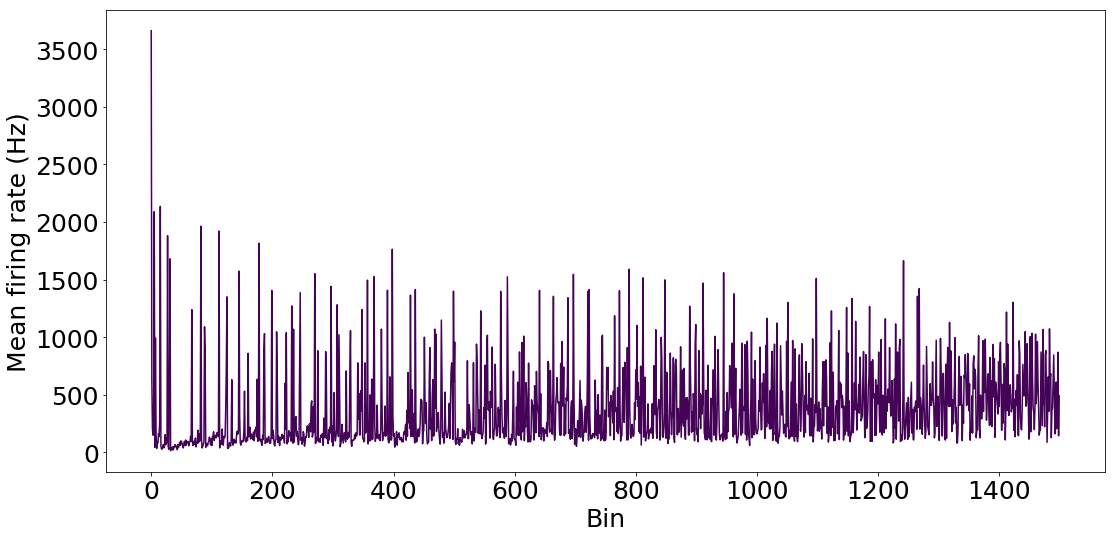

In [57]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=800)
ax1.plot(target_pop_rate_evo, color='#440357')
xticks = np.asarray(np.arange(bins))
# ax1.set_xticks(xticks)
# ax1.set_xticklabels(xticks[::50])

# ax1.set_xlim([-.5, 100])
# ax1.set_ylim([0, 30])
ax1.set_ylabel("Mean firing rate (Hz)")
ax1.set_xlabel("Bin")

# x = np.arange(simtime // 800)
# y = np.logical_or(x%4==1, x%4==2)

# x = np.arange(0.0, 2, 0.01)
# y = np.sin(4*np.pi*x)
# trans = mtransforms.blended_transform_factory(ax1.transData, ax1.transAxes)

# ax1.axhline(theta, color='green', lw=2, alpha=0.5)
# ax1.axhline(-theta, color='red', lw=2, alpha=0.5)
# ax1.fill_between(x, 0, 1, where=y > theta, facecolor='green', alpha=0.5, transform=trans)
# ax1.fill_between(x, 0, 1, where=y < -theta, facecolor='red', alpha=0.5, transform=trans)

# ax1.set_facecolor((1, 0.47, 0.42))

ax1.legend(loc='upper left')
plt.tight_layout()
plt.savefig("xor_rate_evo.png", dpi=800)
plt.show()

In [58]:
target_pop_rate_evo[398:410]

array([ 1763.,   321.,   144.,   163.,    46.,   122.,    91.,   180.,
          63.,   154.,   134.,   170.])

In [59]:
desired_response = np.tile([0, 1, 1, 0], simtime//(4*t_stim))

In [60]:
target_pop_rate_evo.shape

(1500L,)

In [61]:
normalised_firing_rate = target_pop_rate_evo / np.max(target_pop_rate_evo)
print np.min(normalised_firing_rate)
print np.max(normalised_firing_rate)
print np.mean(normalised_firing_rate)
print np.median(normalised_firing_rate)

0.00382618201694
1.0
0.101331146944
0.0583492757584


In [62]:
stats.pearsonr(normalised_firing_rate, desired_response)

(-0.016320717895144651, 0.52763926633544767)

In [63]:
thresholded_output_rates = (normalised_firing_rate>np.mean(normalised_firing_rate)).astype(int)

In [64]:
thresholded_output_rates

array([1, 1, 0, ..., 1, 0, 1])

In [65]:
stats.pearsonr(thresholded_output_rates[500:], desired_response[500:])

(-0.0060043366972086518, 0.84959278544651673)

In [66]:
rmse = np.sqrt(np.mean((desired_response[500:] - thresholded_output_rates[500:])**2))

In [67]:
print rmse

0.70922492906


In [74]:
diff = np.concatenate(([0],(np.ediff1d(target_pop_rate_evo)>=0).astype(int)))

In [75]:
diff.shape

(1500L,)

In [76]:
rd = diff.reshape(4, diff.shape[0]//4)

In [78]:
print np.mean(rd, axis=1)

[ 0.53333333  0.49066667  0.50133333  0.50933333]


In [79]:
print np.mean(thresholded_output_rates.reshape(4, thresholded_output_rates.shape[0]//4), axis=1)

[ 0.16        0.312       0.45333333  0.60533333]
